<a href="https://colab.research.google.com/github/Manjirii07/mlproject/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_index=pd.read_csv('/content/drive/MyDrive/datasets/economic_index.csv')

In [ ]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
## drop unnecessary column
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)


KeyError: "['Unnamed: 0', 'year', 'month'] not found in axis"

In [ ]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
## chech null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


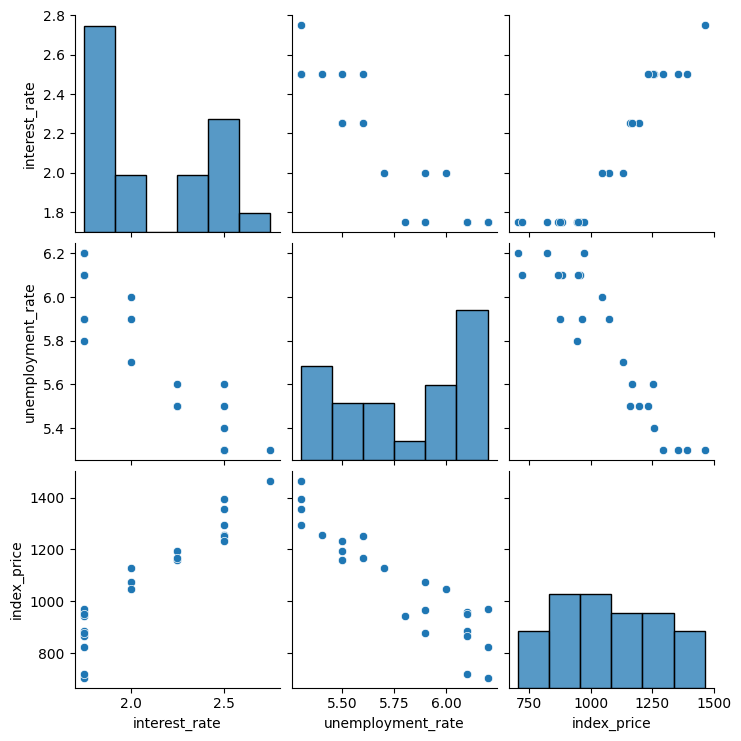

In [ ]:
## lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [ ]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

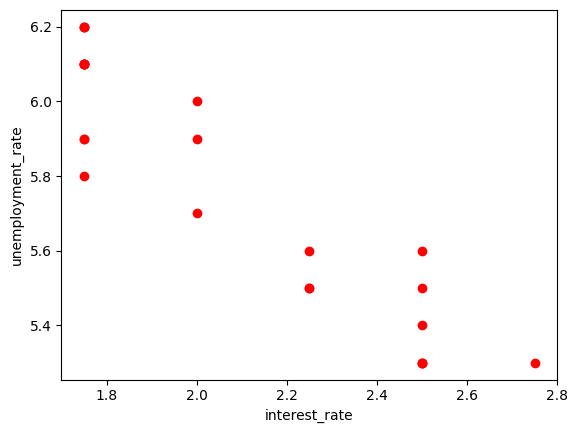

In [ ]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [ ]:
## dependent and independent feature
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [ ]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [ ]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

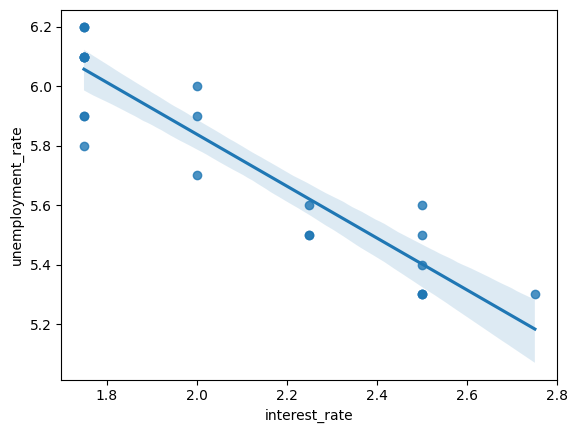

In [ ]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

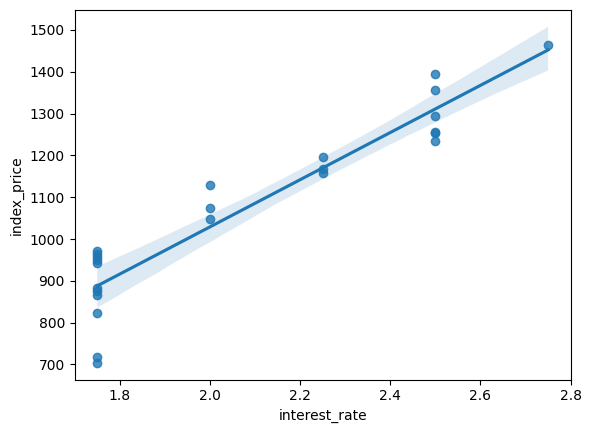

In [ ]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

In [ ]:
## standadization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
X_train

array([[-1.01512945,  0.39413171],
       [-1.01512945,  0.98532928],
       [-1.01512945,  1.28092806],
       [ 0.3904344 , -0.78826342],
       [ 1.09321633, -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.08386221],
       [ 1.09321633, -1.37946099],
       [ 1.09321633, -0.49266464],
       [-1.01512945,  0.98532928],
       [ 0.3904344 , -0.49266464],
       [ 0.3904344 , -0.78826342],
       [-1.01512945,  0.98532928],
       [ 1.09321633, -1.37946099],
       [ 1.79599826, -1.37946099],
       [-1.01512945,  1.28092806],
       [-1.01512945,  0.98532928],
       [-0.31234752,  0.68973049]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [ ]:
np.mean(validation_score)

np.float64(-3875.2750401898634)

In [ ]:
## prediction for test data
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([1022.11617625, 1053.1882909 ,  876.8775728 ,  939.0218021 ,
        923.48574478, 1312.59338314])

In [ ]:
## performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7913.525322008841
72.57394419881076
88.95799751573121


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

## display adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8313408388278933
0.7189013980464889


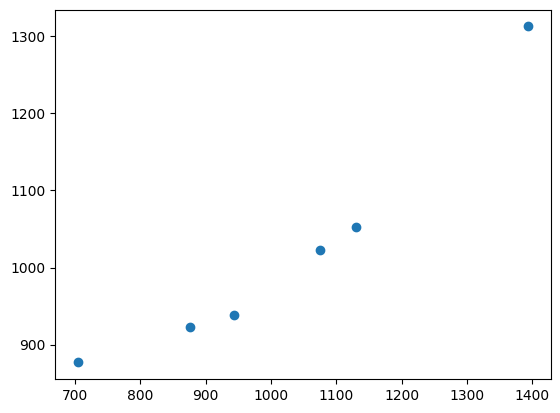

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
residuals=y_test-y_pred
print(residuals)

11     52.883824
10     76.811709
22   -172.877573
14      3.978198
20    -47.485745
1      81.406617
Name: index_price, dtype: float64


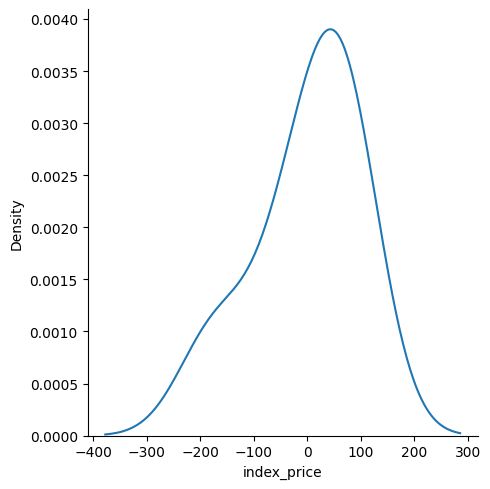

In [ ]:
## Plot this residuals
sns.displot(residuals,kind='kde')

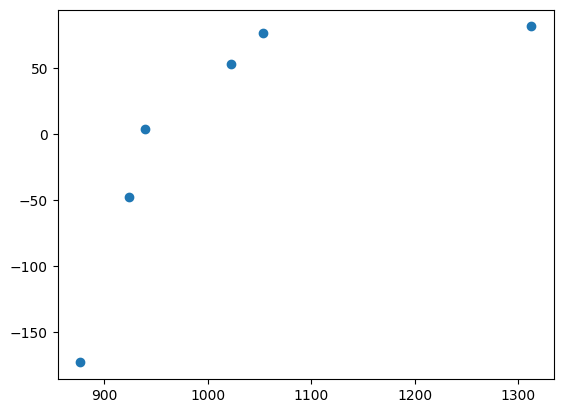

In [ ]:
## scatter plot with respect to presiction and residuals
plt.scatter(y_pred,residuals)

In [ ]:
## OLS linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [ ]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                             0.2464
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                       0.785
Time:                        01:13:06   Log-Likelihood:                         -151.40
No. Observations:                  18   AIC:                                      306.8
Df Residuals:                      16   BIC:                                      308.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           140.3429    873.245      0.161      0.874   -1710.853    1991.539
x2           -52.5579    873.245     -0.060      0.953   -1903.754    1798.638
==============================================================================
Omnibus:                        8.273   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.344
Skew:                          -1.041   Prob(JB):                       0.0691
Kurtosis:                       4.671   Cond. No.                         6.26
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_)

[140.34286806 -52.55792038]
